# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

In [ ]:
# I do not care

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

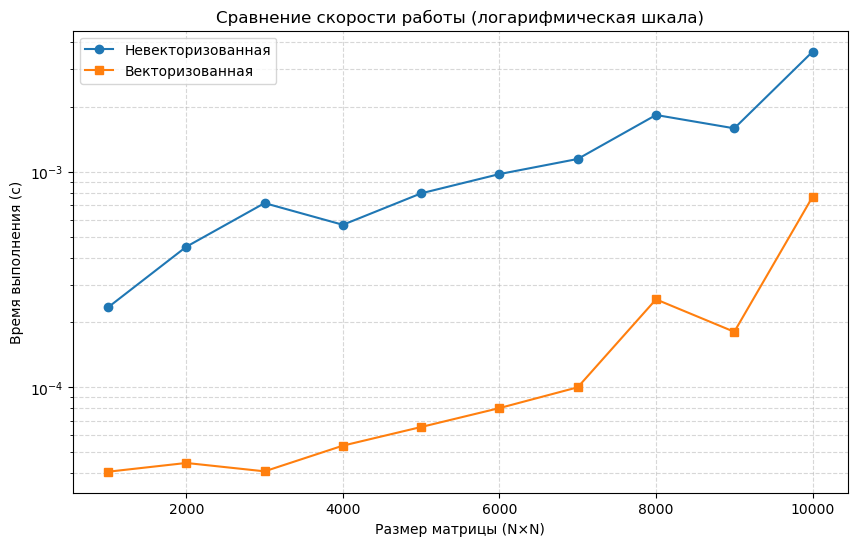

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def prod_non_zero_diag_vectorized(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number

    Vectorized implementation.
    """
    
    diagonal = np.diag(x)
    
    non_zero_mask = diagonal != 0
    
    if np.any(non_zero_mask):
        return np.prod(diagonal[non_zero_mask])
    else:
        return 1
    
def prod_non_zero_diag_non_vectorized(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number

    Not vectorized implementation.
    """

    rows, cols = x.shape

    diag_length = min(rows, cols)

    product = 1

    for i in range(diag_length):
        element = x[i, i]

        if element != 0:
            product *= element
    
    return product

def measure_time(func, matrix, repetitions=10):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        func(matrix)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

data_sizes = np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
time_non_vectorized = []
time_vectorized = []

for size in data_sizes:
    matrix = np.random.rand(size, size)

    time_non_vectorized.append(measure_time(prod_non_zero_diag_non_vectorized, matrix))
    
    time_vectorized.append(measure_time(prod_non_zero_diag_vectorized, matrix))

time_non_vectorized = np.array(time_non_vectorized)
time_vectorized = np.array(time_vectorized)

plt.figure(figsize=(10, 6))
plt.semilogy(data_sizes, time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy(data_sizes, time_vectorized, 's-', label="Векторизованная")
plt.title("Сравнение скорости работы (логарифмическая шкала)")
plt.xlabel("Размер матрицы (N×N)")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


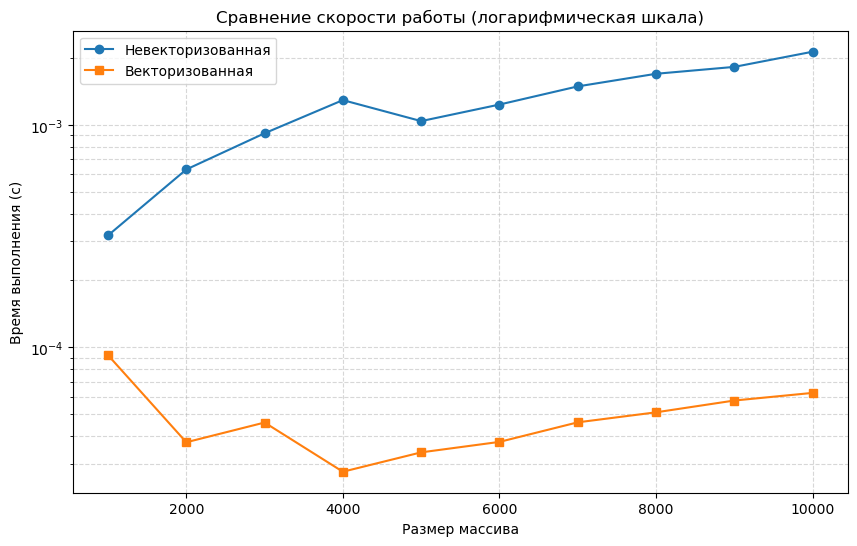

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

def are_multisets_equal_non_vectorized(x, y):
    """Return True if both vectors create equal multisets.
    
    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean
    
    Not vectorized implementation.
    """
    if len(x) != len(y):
        return False
        
    count_x = {}
    for elem in x:
        count_x[elem] = count_x.get(elem, 0) + 1
        
    count_y = {}
    for elem in y:
        count_y[elem] = count_y.get(elem, 0) + 1
        
    return count_x == count_y

def are_multisets_equal_vectorized(x, y):
    """Return True if both vectors create equal multisets.
    
    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean
    
    Vectorized implementation.
    """
    if len(x) != len(y):
        return False
        
    return np.array_equal(np.sort(x), np.sort(y))

def measure_time_two_args(func, arg1, arg2, repetitions=10):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        func(arg1, arg2)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

data_sizes = np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
time_non_vectorized = []
time_vectorized = []

for size in data_sizes:
    x = np.random.randint(0, 100, size=size)
    y = x.copy()
    np.random.shuffle(y)
    
    time_non_vectorized.append(measure_time_two_args(are_multisets_equal_non_vectorized, x, y))
    time_vectorized.append(measure_time_two_args(are_multisets_equal_vectorized, x, y))

time_non_vectorized = np.array(time_non_vectorized)
time_vectorized = np.array(time_vectorized)

plt.figure(figsize=(10, 6))
plt.semilogy(data_sizes, time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy(data_sizes, time_vectorized, 's-', label="Векторизованная")
plt.title("Сравнение скорости работы (логарифмическая шкала)")
plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

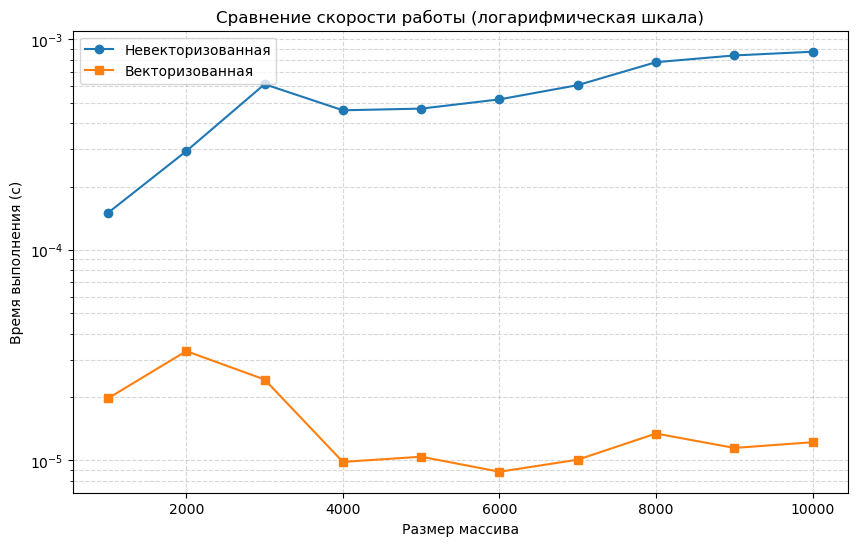

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import time

def max_after_zero_non_vectorized(x):
    """Find max element after zero in array.
    
    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- number (same type as x)
    
    Not vectorized implementation.
    """
    
    max_val = -np.inf
    
    for i in range(len(x) - 1):
        if x[i] == 0:
            if x[i + 1] > max_val:
                max_val = x[i + 1]
    
    return max_val

def max_after_zero_vectorized(x):
    """Find max element after zero in array.
    
    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- number (same type as x)
    
    Vectorized implementation.
    """

    zero_indices = np.where(x[:-1] == 0)[0]

    elements_after_zeros = x[zero_indices + 1]
    return np.max(elements_after_zeros)

def measure_time_one_arg(func, arg, repetitions=10):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        func(arg)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

data_sizes = np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
time_non_vectorized = []
time_vectorized = []

for size in data_sizes:
    x = np.random.randint(1, 100, size=size)
    zero_indices = np.random.choice(size, size=size//10, replace=False)
    x[zero_indices] = 0
    
    time_non_vectorized.append(measure_time_one_arg(max_after_zero_non_vectorized, x))
    time_vectorized.append(measure_time_one_arg(max_after_zero_vectorized, x))

time_non_vectorized = np.array(time_non_vectorized)
time_vectorized = np.array(time_vectorized)

plt.figure(figsize=(10, 6))
plt.semilogy(data_sizes, time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy(data_sizes, time_vectorized, 's-', label="Векторизованная")
plt.title("Сравнение скорости работы (логарифмическая шкала)")
plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()

 
 
* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


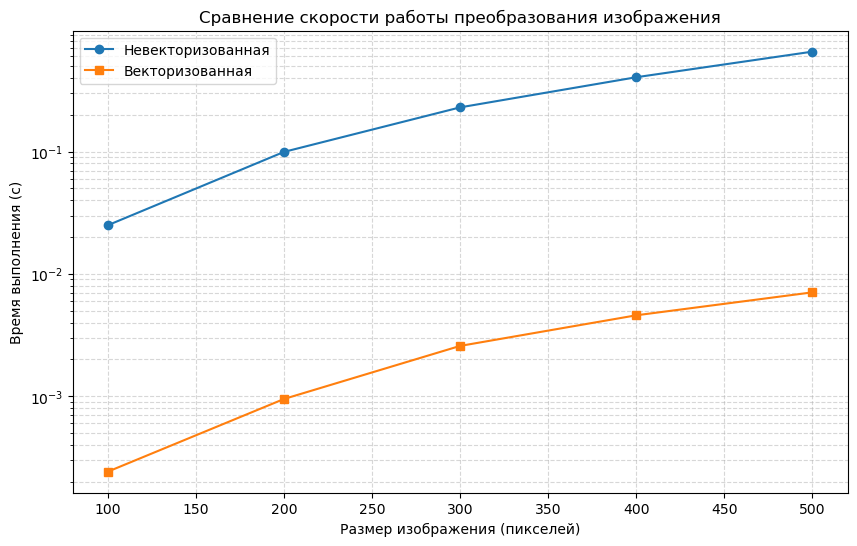

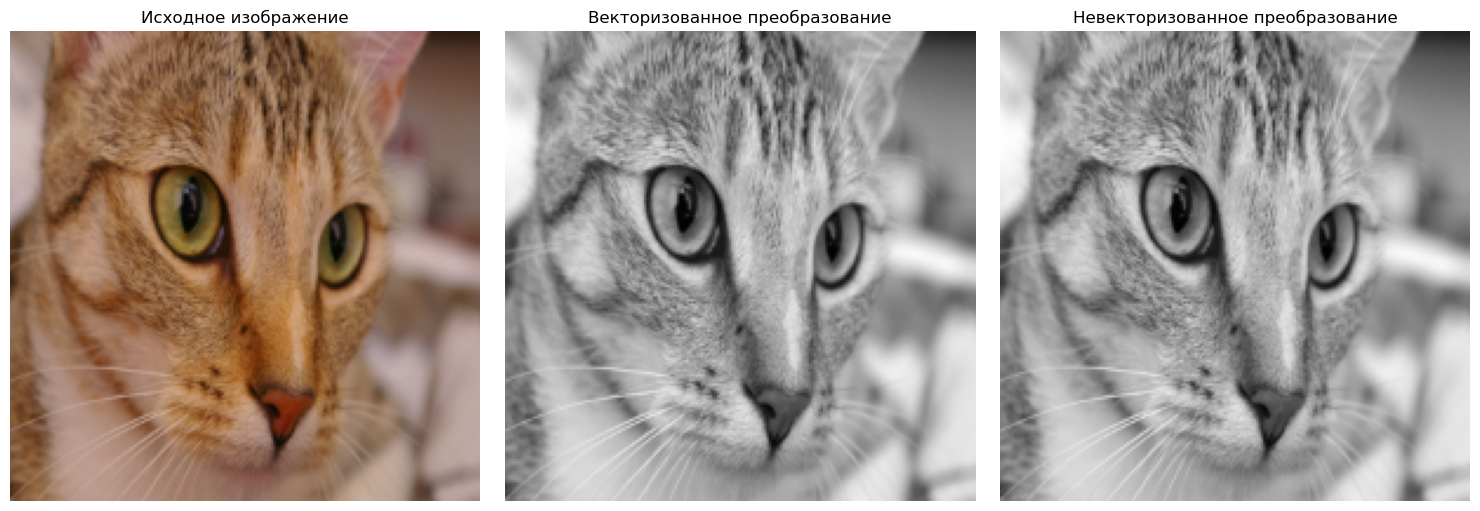

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import time

def convert_image_vectorized(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Vectorized implementation.
    """
    return np.sum(img * coefs, axis=2)

def convert_image_non_vectorized(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Not vectorized implementation.
    """
    H, W, C = img.shape
    result = np.zeros((H, W), dtype=img.dtype)
    
    for i in range(H):
        for j in range(W):
            for k in range(C):
                result[i, j] += img[i, j, k] * coefs[k]
    
    return result

def measure_time_two_args(func, arg1, arg2, repetitions=10):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        func(arg1, arg2)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

image_sizes = [(100, 100), (200, 200), (300, 300), (400, 400), (500, 500)]
time_non_vectorized = []
time_vectorized = []

for size in image_sizes:
    img = np.random.rand(size[0], size[1], 3).astype(np.float32)
    coefs = np.array([0.299, 0.587, 0.114]) # TODO (never): constant
    
    time_non_vectorized.append(measure_time_two_args(convert_image_non_vectorized, img, coefs))
    time_vectorized.append(measure_time_two_args(convert_image_vectorized, img, coefs))

plt.figure(figsize=(10, 6))
plt.semilogy([s[0] for s in image_sizes], time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy([s[0] for s in image_sizes], time_vectorized, 's-', label="Векторизованная")
plt.title("Сравнение скорости работы преобразования изображения")
plt.xlabel("Размер изображения (пикселей)")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()


from skimage import data
from skimage.transform import resize

# Вообще, я лично за то, чтобы использовать bmp в таких случаях
original_img = data.cat() # Знаменитость
img = resize(original_img, (200, 200))
coefs = np.array([0.299, 0.587, 0.114]) # Гарри, ты волшебник
    
result_vectorized = convert_image_vectorized(img, coefs)
result_non_vectorized = convert_image_non_vectorized(img, coefs)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("Исходное изображение")
axes[0].axis('off')
    
axes[1].imshow(result_vectorized, cmap='gray')
axes[1].set_title("Векторизованное преобразование")
axes[1].axis('off')
    
axes[2].imshow(result_non_vectorized, cmap='gray')
axes[2].set_title("Невекторизованное преобразование")
axes[2].axis('off')
    
plt.tight_layout()
plt.show()


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

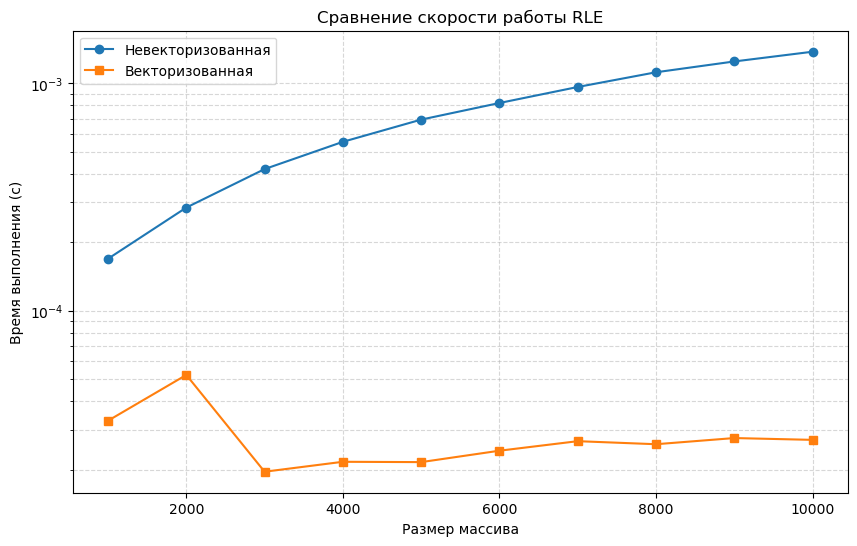

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def run_length_encoding_non_vectorized(x):
    """Make run-length encoding.
    
    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables
    
    Not vectorized implementation.
    """
    elements = []
    counters = []
    
    current_element = x[0]
    current_count = 1
    
    for i in range(1, len(x)):
        if x[i] == current_element:
            current_count += 1
        else:
            elements.append(current_element)
            counters.append(current_count)
            current_element = x[i]
            current_count = 1
    
    elements.append(current_element)
    counters.append(current_count)
    
    return np.array(elements), np.array(counters)

def run_length_encoding_vectorized(x):
    """Make run-length encoding.
    
    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables
    
    Vectorized implementation.
    """
    change_indices = np.where(x[:-1] != x[1:])[0] + 1
    
    start_indices = np.concatenate(([0], change_indices))
    end_indices = np.concatenate((change_indices, [len(x)]))
    
    run_lengths = end_indices - start_indices
    
    unique_elements = x[start_indices]
    
    return unique_elements, run_lengths

def measure_time_one_arg(func, arg, repetitions=10):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        func(arg)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times)

data_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

time_non_vectorized = []
time_vectorized = []

for size in data_sizes:
    x = np.repeat(np.random.randint(0, 100, size=size//10), 10)
    
    time_non_vectorized.append(measure_time_one_arg(run_length_encoding_non_vectorized, x))
    time_vectorized.append(measure_time_one_arg(run_length_encoding_vectorized, x))

plt.figure(figsize=(10, 6))
plt.semilogy(data_sizes, time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy(data_sizes, time_vectorized, 's-', label="Векторизованная")
plt.title("Сравнение скорости работы RLE")
plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

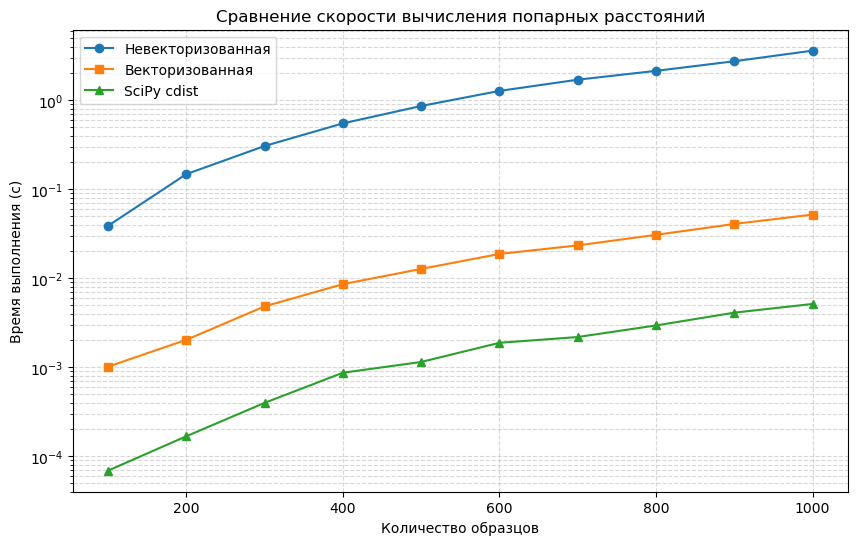

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.spatial import distance

def pairwise_distance_non_vectorized(x, y):
    """Return pairwise object distance.
    
    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array
    
    Not vectorized implementation.
    """
    n = x.shape[0]
    m = y.shape[0]
    dist_matrix = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            dist_matrix[i, j] = np.sqrt(np.sum((x[i] - y[j]) ** 2))
    
    return dist_matrix

def pairwise_distance_vectorized(x, y):
    """Return pairwise object distance.
    
    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array
    
    Vectorized implementation.
    """
    return np.sqrt(np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :]) ** 2, axis=-1))


data_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_features = 10

time_non_vectorized = []
time_vectorized = []
time_scipy = []

for n in data_sizes:
    x = np.random.rand(n, n_features)
    y = np.random.rand(n, n_features)
    
    start_time = time.time()
    pairwise_distance_non_vectorized(x, y)
    time_non_vectorized.append(time.time() - start_time)
    
    start_time = time.time()
    pairwise_distance_vectorized(x, y)
    time_vectorized.append(time.time() - start_time)
    
    start_time = time.time()
    distance.cdist(x, y)
    time_scipy.append(time.time() - start_time)

plt.figure(figsize=(10, 6))
plt.semilogy(data_sizes, time_non_vectorized, 'o-', label="Невекторизованная")
plt.semilogy(data_sizes, time_vectorized, 's-', label="Векторизованная")
plt.semilogy(data_sizes, time_scipy, '^-', label="SciPy cdist")
plt.title("Сравнение скорости вычисления попарных расстояний")
plt.xlabel("Количество образцов")
plt.ylabel("Время выполнения (с)")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

https://www.markdownguide.org/basic-syntax/


## Чем мы занимались

* Имплементировали несколько _базовых_ функций с помощью **cpu** и **gpu**

> Для cpu мы использовали python как основной инструмент

> Для gpu же мы использовали в основном библиотеку numpy, которая является обвязкой на c++ для крутого функционала
